# Proyecto Final NLP

```
- Instalando dependencias
```



In [1]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 96 kB/s 
     |████████████████████████████████| 6.8 MB 52.9 MB/s 
     |████████████████████████████████| 981 kB 25.5 MB/s 
     |████████████████████████████████| 263 kB 61.5 MB/s 
     |████████████████████████████████| 1.9 MB 37.6 MB/s 
     |████████████████████████████████| 1.2 MB 52.9 MB/s 
     |████████████████████████████████| 468 kB 56.2 MB/s 
     |████████████████████████████████| 895 kB 39.5 MB/s 
     |████████████████████████████████| 3.3 MB 48.9 MB/s 
  Created wheel for ktrain: filename=ktrain-0.27.2-py3-none-any.whl size=25283087 sha256=b98a83ada1fbf19968b928354ec6361a00b6048bf4778831e2e2e6b14f95d019
  Stored in directory: /root/.cache/pip/wheels/88/be/4a/971c83a380a40f12e877f643ca1b94dc65f528f94c88dbcff7
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=beef9200183de1bf76379479a71b7690dd3ab03774345a9e3486386f6008642f
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff0



# Importando dependencias



In [2]:
import numpy as np
import pandas as pd
import ktrain
from ktrain import text


```
- Correr esta celda para ver si se tiene TPU, de igual manera cambiar entorno de ejecución a TPU
```

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)

Tensorflow version 2.5.0
Running on TPU  ['10.75.102.26:8470']


INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0



# Juntando los dataframes


In [3]:
df1 = pd.read_csv('Reddit1_resumido.csv')

In [4]:
df2 = pd.read_csv('Reddit2_resumido.csv')

In [5]:
df3 = pd.read_csv('Reddit3_resumido.csv')

In [6]:
df4 = pd.read_csv('Reddit4_resumido.csv')

In [7]:
df5 = pd.read_csv('dataTwitter(Final).csv')

In [8]:
df5

,text,sentiment
0,Step 0: 2 months ago... 3 push ups 3 crunch...,0
1,HesseKenny TooSly4u2 CleverSubtle RexChapman ...,0
2,You are totally blocked from reality. guylaha...,0
3,DavePalet jeffdotseth Preller traded you to L...,0
4,What? I got NOTHING off the WHEEL AND IT SAID...,0
...,...,...
19995,The Front - Quasimoto - Make/Do Something. wh...,1
19996,Be kind humans bros bros peace wholesome huma...,1
19997,Guy in my neighborhood started sharing his ha...,1
19998,Kindness is the answer. Spread the good vibes...,1


In [9]:
frames = [df1, df2,df3,df4,df5]

In [10]:
dfFinal = pd.concat(frames)

In [11]:
dfFinal

,text,sentiment
0,I m looking into long term solutions but right...,0
1,Chronic Depression I m at this nihilistic poin...,0
2,I just don t feel like doing anything anymore ...,0
3,I was on lonely as I was feeling that way I co...,0
4,Reached the end of my rope Alcoholism worse th...,0
...,...,...
19995,The Front - Quasimoto - Make/Do Something. wh...,1
19996,Be kind humans bros bros peace wholesome huma...,1
19997,Guy in my neighborhood started sharing his ha...,1
19998,Kindness is the answer. Spread the good vibes...,1


```
- Se cambia el encoding de sentiment
```


In [12]:
dfFinal['sentiment'] = dfFinal['sentiment'].replace(0, 'depr')

In [13]:
dfFinal['sentiment'] = dfFinal['sentiment'].replace(1, 'not_dpr')

In [14]:
dfFinal

,text,sentiment
0,I m looking into long term solutions but right...,depr
1,Chronic Depression I m at this nihilistic poin...,depr
2,I just don t feel like doing anything anymore ...,depr
3,I was on lonely as I was feeling that way I co...,depr
4,Reached the end of my rope Alcoholism worse th...,depr
...,...,...
19995,The Front - Quasimoto - Make/Do Something. wh...,not_dpr
19996,Be kind humans bros bros peace wholesome huma...,not_dpr
19997,Guy in my neighborhood started sharing his ha...,not_dpr
19998,Kindness is the answer. Spread the good vibes...,not_dpr


# Seperando los datos en train y test

In [15]:
from sklearn.model_selection import train_test_split

data_train, data_test  = train_test_split(dfFinal, test_size=0.5, random_state=42)

In [16]:
data_train

,text,sentiment
4441,Bye It hurts cutting it hurts washing them it ...,depr
3300,The older generations would probably try to s...,not_dpr
1957,Yeah if hell exists I want to go there Endless...,depr
200,"RT tziou_prd: ""Lonely"" photoshop adobephotosh...",depr
10835,Parents are the architect of a better tomorro...,not_dpr
...,...,...
1850,Everything is Everything is Everything from ...,not_dpr
1265,I was gaslighted my entire life and now I gas...,depr
1284,iBuyPower threw matches betting against thems...,not_dpr
860,I am going to die tomorrowCan t wait Today was...,depr


In [17]:
data_test

,text,sentiment
2232,Put the house keys down and step away from th...,not_dpr
2335,"I want Portal 3 so bad, I want it so bad . I ...",not_dpr
18800,RT divyanshsikka: Something [OC] comic comic...,not_dpr
4884,My MI was getting worse and I lost my job beca...,depr
4450,GOJOKIMA: Can we pretend that airplanes in th...,depr
...,...,...
19487,Sunday Drive - Ladyhawke - DJ Steppin' Razor ...,not_dpr
17543,Happy Yoonderful Day YOONJAEHYUK treasurememb...,not_dpr
4229,"It s this s this is this: ""It's not this. It'...",not_dpr
1101,i ve been quiet as shit for most of my life so...,depr


# Usando la libreria de Ktrain usamos el wrapper para obtener los textos tokenizados

In [18]:
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df=data_train, 
                   text_column= 'text', 
                   label_columns = 'sentiment',
                   val_df = data_test,
                   maxlen = 400,
                   preprocess_mode='bert')

['depr', 'not_dpr']
       depr  not_dpr
4441    1.0      0.0
3300    0.0      1.0
1957    1.0      0.0
200     1.0      0.0
10835   0.0      1.0
['depr', 'not_dpr']
       depr  not_dpr
2232    0.0      1.0
2335    0.0      1.0
18800   0.0      1.0
4884    1.0      0.0
4450    1.0      0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


# Vemos la shape de los datos, esta es del tamaño de train y el max_len de tokenizado de bert (Este soporta hasta 512)

In [19]:
X_train[0].shape

(18490, 400)

# Creamos el modelo con bert, los datos de entranimiento y el objeto preprocess obtenidos de usar el wrapper de text de Ktrain

In [20]:
model = text.text_classifier(name='bert', 
                             train_data=(X_train, y_train),
                             preproc = preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 400)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 400)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 400, 768), ( 23440896    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 400, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

# Creamos el objeto learner con la función get_learner, donde le pasamos el modelo, los datos de entramiento y de validación asi como el batch size

In [22]:
learner = ktrain.get_learner(model=model,
                            train_data=(X_train, y_train),
                             val_data = (X_test, y_test),
                             batch_size=6)

# Entrenamos nuestro objeto learner con un learning rate y el número de epochs deseadas

In [ ]:
history = learner.fit_onecycle(lr=2e-5, epochs=1)

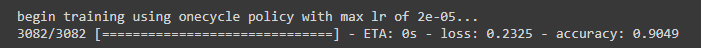

# Métricas

Entrenado en un epoc, se consiguio un **accuracy** de 0.9049 con **loss** de 0.2325, usando todos los datos por problemas de colab no se guardo el history y no se pudieron hacer las funciones especiales de ktrain como:
```
learner.plot('loss')
learner.plot('lr')
```

In [24]:
learner

# Creamos el objeto predictor con el modelo del learner y el prepocess

In [27]:
predictor = ktrain.get_predictor(learner.model, preproc=preprocess)

In [56]:
data = ['I am very sad beacause today my girlfriend broke up with me.',
        'I had a great day today. My dad bought me a videogame i wanted for ever.',
        'There is never any point in waking up. I’ve been going to a shit dead end job for 16 years. I’m 34, live with my mother, can’t drive, have no skills, no qualifications, no interests, no motivation, no money, own nothing and a ton more fucking problems.',
        'Awww that is my twin brother talking like a deflating airbag and I just listen because it is entertaining.',
        'You have made an amazing change! I don’t know you, but super proud of your determination and effort! Bravo and keep at it',
        'At this point, suicide seems like the easiest solution to all my problems. I hate school and I hate myself even more.',
        'I do not like to go out anymore.',
        'My dad just left me and now I am all alone',
        'Just got a new computer.']

# Predecimos con los datos creados anteriormente

In [57]:
predictor.predict(data)

['depr',
 'not_dpr',
 'depr',
 'not_dpr',
 'not_dpr',
 'depr',
 'depr',
 'depr',
 'not_dpr']

# Guardamos los pesos del modelo

In [32]:
predictor.save('/content/bert')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Cargando modelo con pesos

In [35]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/Model/bert')

# Se crea un nuevo learner con el predictor

In [36]:
learner = ktrain.get_learner(predictor.model, train_data = (X_train, y_train), batch_size = 6)

# Ya podemos predecir con el modelo cargado

In [58]:
predictor.predict(data)

['depr',
 'not_dpr',
 'depr',
 'not_dpr',
 'not_dpr',
 'depr',
 'depr',
 'depr',
 'not_dpr']

# Matriz de confusión Manual

In [59]:
y_true = [0,1,0,1,1,0,0,0,1]

In [60]:
y_pred = [0,1,0,1,1,0,0,0,1]

In [61]:
import seaborn as sns

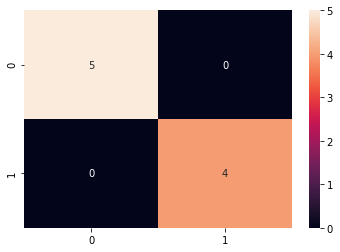

In [62]:
cm = confusion_matrix(y_true, y_pred)
f = sns.heatmap(cm, annot=True)